In [22]:
#Problem 1
#The object Triangle receives a list of three tuples V which are the coordinates of a triangle vertices.
#Methods:
#vertex(n) gives the coordinates of the nth vertex
#side(n) returns the coordinates of the vertices related to the nth side
#midpoint(n) returns the midpoint of the nth side
#show(color=‘k’) plots the triangle
#__str__() returns the coordinates of vertices as a string

import matplotlib.pyplot as plt

class Triangle(object):
    def __init__(self, V):          #v as input
        
        #type check; v has to be a LIST of 3 TUPLES
        if(isinstance(V, list) and len(V) == 3):
            pass
        else:
            raise(TypeError("Need a list."))
        
        #check if all the elements are tuples
        ##know the difference between any and all
        if (all(isinstance(element, tuple) for element in V)):
            pass
        else: 
            raise(Exception('Coordinates should be tuples'))

        self.V = V

    def vertex(self, n):            #coordinates of vertex
        #return self.V[n-1]
        #or do the professor's; need to do this to plot
        return self.V[n%3-1][0], self.V[n%3-1][1]

    def side(self, n):               #coordinates of the vertices of the sides
         #professor's way
        return[self.vertex(n), self.vertex(n+1)]   

    def midpoint(self, n):
        return (sum(x for x, y in self.side(n))/2, sum(y for y, y in self.side(n))/2)

    def show(self, color = 'k'):
        xs = []
        ys = []                #because plt.fill needs lists as parameters
        for i in range(1,4):
            xs.append(self.vertex(i)[0])
            ys.append(self.vertex(i)[1])
        plt.fill(xs, ys, color)
        #don't do plt.show(), because it draws as different triangle

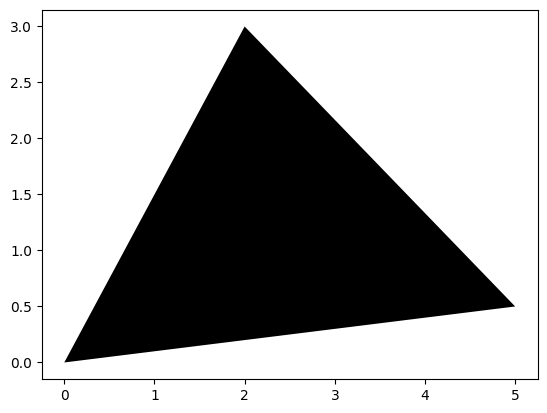

In [19]:
#Problem 1 Solution
#Test Case
a = Triangle([(0,0), (5, 0.5), (2,3)])
a.show()

In [20]:
#Problem 2
#From the book?
#n=0 is the base case
#use recursion; takes the base case and puts a white inverted triangle in the middle; gives us three black triangles

def Sierpinski_triangle(triangle_1, i):
    if i ==1:
        triangle_1.show(color = 'k')

        triangle_2 = Triangle([triangle_1.midpoint(1), triangle_1.midpoint(2), triangle_1.midpoint(3)])
        triangle_2.show(color = 'w')

    else:
        triangle_3 = Triangle([triangle_1.vertex(1), triangle_1.midpoint(1), triangle_1.midpoint(3)])
        triangle_4 = Triangle([triangle_1.midpoint(1), triangle_1.vertex(2), triangle_1.midpoint(2)])
        triangle_5 = Triangle([triangle_1.midpoint(3), triangle_1.midpoint(2), triangle_1.vertex(3)])
        
        Sierpinski_triangle(triangle_3, i-1)
        Sierpinski_triangle(triangle_4, i-1)
        Sierpinski_triangle(triangle_5, i-1)


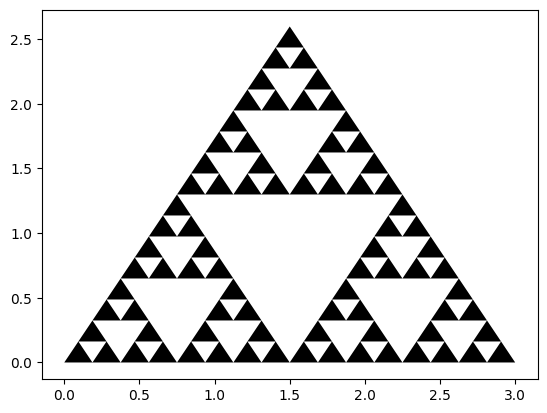

In [21]:
#Problem 2 Solution

side = 3; #The length of sides
a=Triangle([(0,0),(side,0),(side/2,(side**2-(side/2)**2)**0.5)])
Sierpinski_triangle(a,4)

In [70]:
#Problem 3
#assuming P1 = (0,0)
#P(i+1) = midppint of P(i) and one of P(1), P(2), P(3)
#P(1) =  P(0) and P(1), P(2), P(3)
#Get random integer from 1 to 3 to select a random vertex
#take the average with the the selected random vertex and the previous vertex
#append it. 

from numpy.random import randint
import matplotlib.pyplot as plt

def my_Sierpinski(n):
    
    #Vertices of equilateral triangle
    V = [(0,0), (0.5, (3)**0.5/2), (1,0)]

    #base case
    #write separately instead of tuple, because later easier to plot when using scatter
    x = [0]
    y = [0]

    for i in range(1,n):
        k = randint(0,3)
        x.append(0.5*(V[k][0] + x[i - 1]))
        y.append(0.5*(V[k][1] + y[i - 1]))

    plt.scatter(x,y, s = 1, color='b')                  #s is the size of the dots
    plt.show()


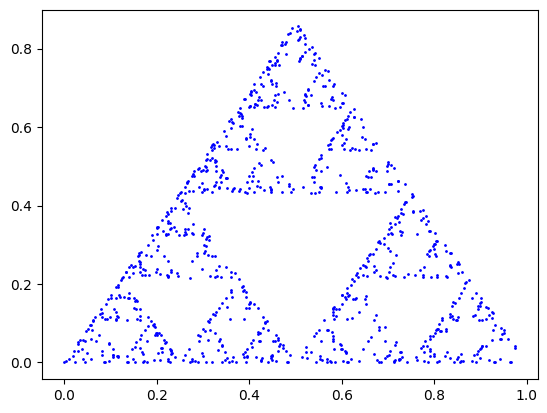

In [71]:
#Problem 3 Solution
my_Sierpinski(1000)